In [1]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Copy of brazil _forest_fire.csv',encoding='iso-8859-1')
df

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01


Q1.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


In [3]:
df.head(5)

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


Q2.

In [4]:
df.tail(5)

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


Q3.

In [5]:
c=len(df.columns)
print('No. of columns:',c)

No. of columns: 5


In [7]:
r=len(df)
print('No. of rows:',r)

No. of rows: 6454


Q4.

In [8]:
df.duplicated().any()

True

In [9]:
newdf=df.drop_duplicates()

In [10]:
newdf.duplicated().any()

False

Q6.

In [11]:
newdf.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

Q7.

In [12]:
newdf.describe()

,year,number
count,6422.000000,6422.000000
mean,2007.490969,108.815178
std,5.731806,191.142482
min,1998.000000,0.000000
25%,2003.000000,3.000000
50%,2007.000000,24.497000
75%,2012.000000,114.000000
max,2017.000000,998.000000


Q8.

In [13]:
df['month'].unique()

array(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
      dtype=object)

In [14]:
df['month']=df['month'].map({'Janeiro':'Jan', 'Fevereiro':'Feb', 'Março':'Mar', 'Abril':'Apr', 'Maio':'May', 'Junho':'Jun', 'Julho':'Jul',
       'Agosto':'Aug', 'Setembro':'Sep', 'Outubro':'Oct', 'Novembro':'Nov', 'Dezembro':'Dec'})

Q9.

In [15]:
df.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

In [16]:
fir=df['number'].sum()
print('Total no. of register fires:',fir)

Total no. of register fires: 698924.073


Q10.

In [17]:
ndf=df.groupby('month')['number'].sum().sort_values(ascending=False)

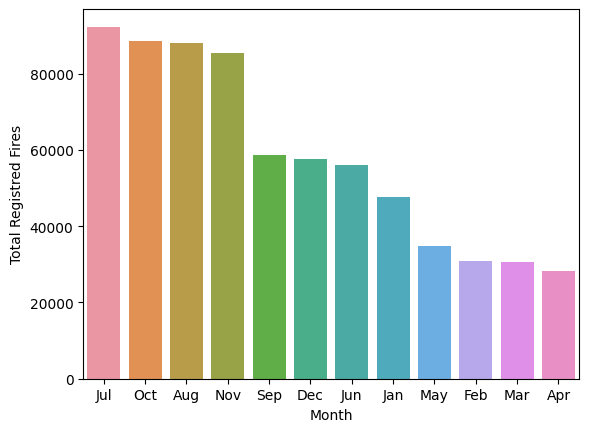

In [18]:
import seaborn as sb
import matplotlib.pyplot as plt
lb=sb.barplot(x=ndf.index,y=ndf.values)
plt.ylabel("Total Registred Fires")
plt.xlabel("Month")
plt.show()

Q11.

In [19]:
df['date']=pd.to_datetime(df['date'])

In [31]:
ydf=df.groupby('year')['number'].sum()

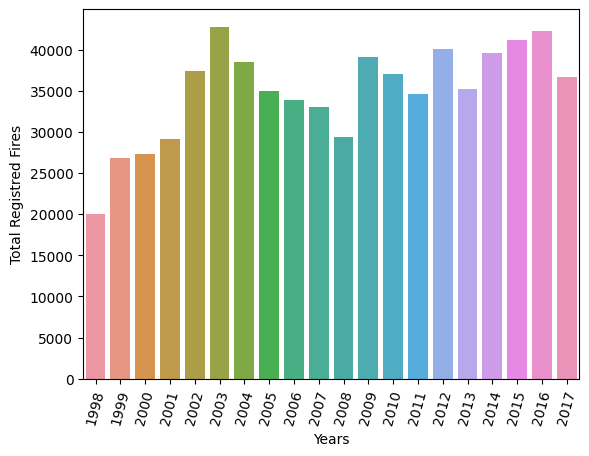

In [22]:
sb.barplot(x=ydf.index,y=ydf.values)
plt.ylabel("Total Registred Fires")
plt.xlabel("Years")
plt.xticks(rotation=75)
plt.show()

Q12.

In [23]:
sdf=df.groupby('state')['number'].sum()

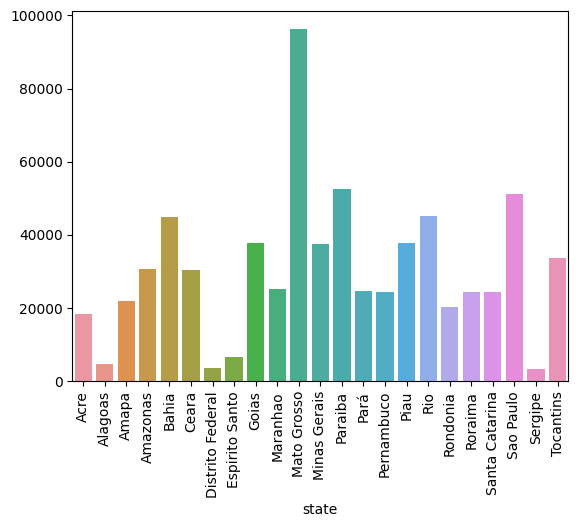

In [24]:
sb.barplot(x=sdf.index,y=sdf.values)
plt.xticks(rotation='vertical')
plt.show()

Q13.

In [25]:
adf=df[df['state']=='Amazonas']
adf['number'].sum()

30650.129

Q14.

In [26]:
amz=adf.groupby('year')['number'].sum()

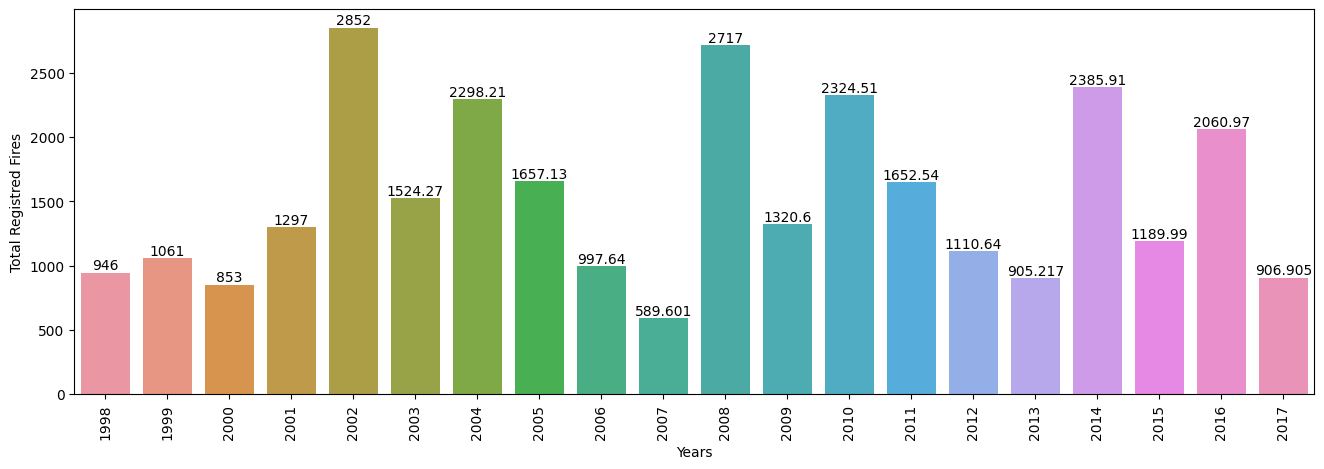

In [30]:
plt.figure(figsize=(16,5))
lb=sb.barplot(x=amz.index,y=amz.values)
plt.xticks(rotation='vertical')
plt.ylabel("Total Registred Fires")
plt.xlabel("Years")
for i in lb.containers:
  lb.bar_label(i)
plt.show()

Q15

In [28]:
a_mon=adf.groupby('month')['number'].sum()

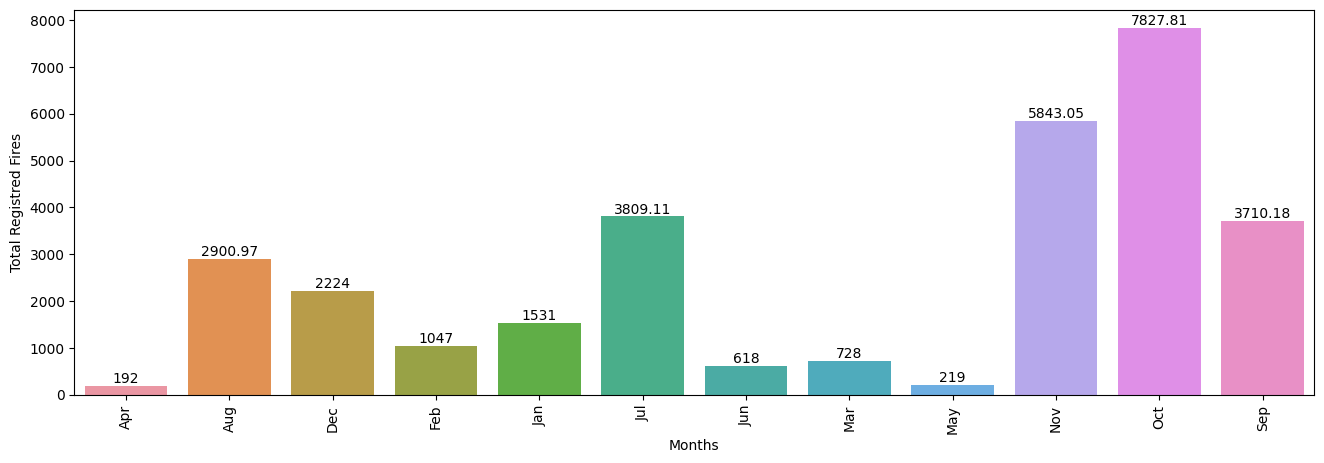

In [29]:
plt.figure(figsize=(16,5))
lb=sb.barplot(x=a_mon.index,y=a_mon.values)
plt.xticks(rotation='vertical')
plt.ylabel("Total Registred Fires")
plt.xlabel("Months")
for item in lb.containers:
  lb.bar_label(item)
plt.show()

Q16.

In [34]:
pydf=df[df['year']==2015]
pydf

,year,state,month,number,date
17,2015,Acre,Jan,1.000,2015-01-01
37,2015,Acre,Feb,2.000,2015-01-01
57,2015,Acre,Mar,2.000,2015-01-01
77,2015,Acre,Apr,3.000,2015-01-01
97,2015,Acre,May,2.000,2015-01-01
...,...,...,...,...,...
6372,2015,Tocantins,Aug,2.540,2015-01-01
6392,2015,Tocantins,Sep,5.510,2015-01-01
6412,2015,Tocantins,Oct,4.844,2015-01-01
6432,2015,Tocantins,Nov,833.000,2015-01-01


In [36]:
s_df=pydf.groupby('month')['number'].sum()
s_df

month
Apr    2573.000
Aug    4363.125
Dec    4088.522
Feb    2309.000
Jan    4635.000
Jul    4364.392
Jun    3260.552
Mar    2202.000
May    2384.000
Nov    4034.518
Oct    4499.525
Sep    2494.658
Name: number, dtype: float64

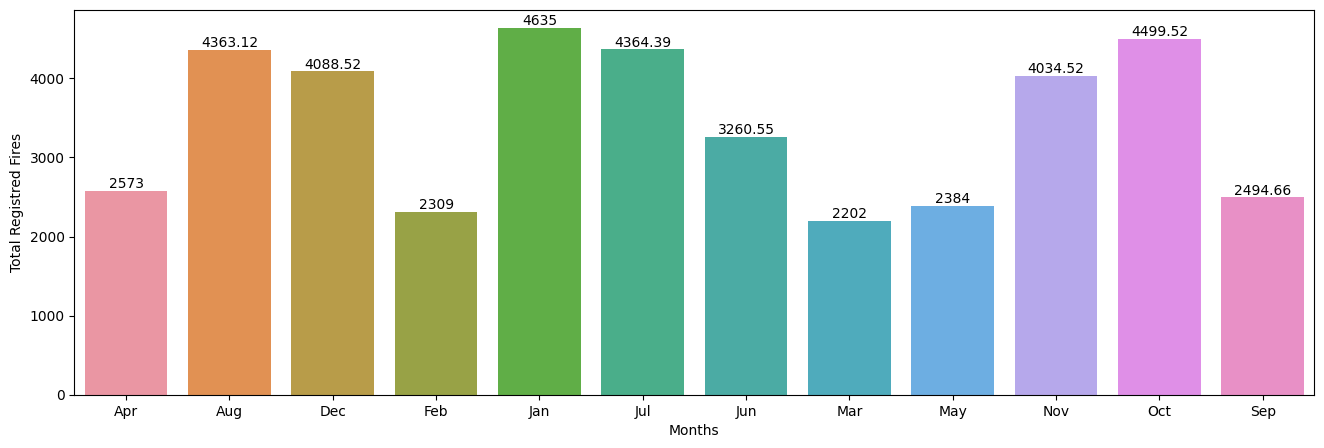

In [39]:
plt.figure(figsize=(16,5))
lb=sb.barplot(x=s_df.index,y=s_df.values)
plt.ylabel("Total Registred Fires")
plt.xlabel("Months")
for item in lb.containers:
  lb.bar_label(item)
plt.show()

Q17.

In [43]:
avg_rpt=df.groupby('month')['number'].mean().sort_values(ascending=False)
avg_rpt

month
Jul    170.974283
Oct    164.225146
Aug    163.056361
Nov    158.348248
Dec    112.154932
Sep    108.478343
Jun    103.723472
Jan     88.258492
May     64.317339
Feb     57.126019
Mar     56.884083
Apr     52.201426
Name: number, dtype: float64

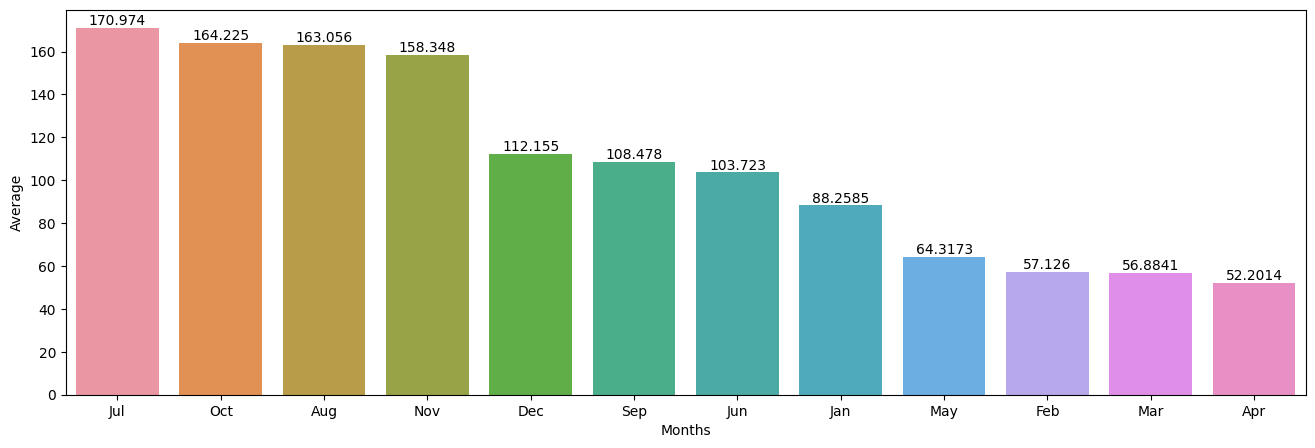

In [45]:
plt.figure(figsize=(16,5))
lb=sb.barplot(x=avg_rpt.index,y=avg_rpt.values)
plt.ylabel("Average")
plt.xlabel("Months")
for item in lb.containers:
  lb.bar_label(item)
plt.show()

Q18.

In [53]:
dec_df=df[df['month']=='Dec']
dec_df

,year,state,month,number,date
220,1998,Acre,Dec,7.0,1998-01-01
221,1999,Acre,Dec,0.0,1999-01-01
222,2000,Acre,Dec,0.0,2000-01-01
223,2001,Acre,Dec,0.0,2001-01-01
224,2002,Acre,Dec,1.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dec,128.0,2012-01-01
6450,2013,Tocantins,Dec,85.0,2013-01-01
6451,2014,Tocantins,Dec,223.0,2014-01-01
6452,2015,Tocantins,Dec,373.0,2015-01-01


In [55]:
vis_dec=dec_df.groupby('state')['number'].sum()

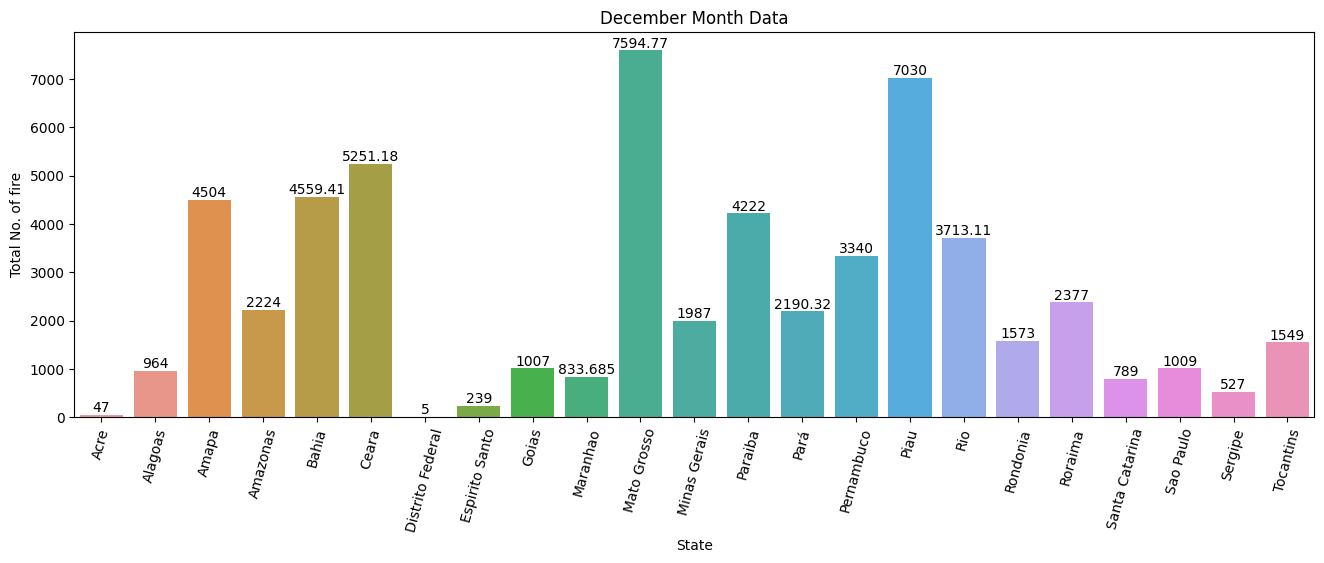

In [58]:
plt.figure(figsize=(16,5))
lb=sb.barplot(x=vis_dec.index,y=vis_dec.values)
plt.ylabel("Total No. of fire")
plt.xlabel("State")
plt.title('December Month Data')
plt.xticks(rotation=75)
for item in lb.containers:
  lb.bar_label(item)
plt.show()